In [20]:
import pandas as pd
from pprint import pprint

In [15]:
adm_df = pd.read_csv('data/discharge_merged_df.csv')
adm_df
# adm_df.rename(columns={'text': 'adm_text'}, inplace=True)

,hadm_id,discharge_location,CARD_ARRHYTHMIA,CELL_SKIN_INF,CELL_NO_MCC,CESAREAN,CVA_INFARCT,PANCREAS_DIS,DIGEST_DIS_NO_MCC,HEART_FAILURE,...,DIGEST_DIS_OTHER,GASTRO_NAUSEA,PNEUMONIA_OTHER,PCI_NO_AMI,PSYCHOSES,SEPTICEMIA,SYNCOPE,VAG_DELIVERY,VAG_DEL_NO_COMPL,disch_journal_text
0,29659838,HOME HEALTH CARE,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"Admission Type: EW EMER., Admission Location: ..."
1,20897796,HOME HEALTH CARE,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"Admission Type: OBSERVATION ADMIT, Admission L..."
2,21975601,HOME,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"Admission Type: EW EMER., Admission Location: ..."
3,28994087,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"Admission Type: EW EMER., Admission Location: ..."
4,26295318,SKILLED NURSING FACILITY,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"Admission Type: URGENT, Admission Location: TR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20232,25047276,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Admission Type: SURGICAL SAME DAY ADMISSION, A..."
20233,20274882,HOME,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"Admission Type: OBSERVATION ADMIT, Admission L..."
20234,28129567,HOME,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"Admission Type: URGENT, Admission Location: PH..."
20235,27638769,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"Admission Type: EW EMER., Admission Location: ..."


In [16]:
adm_df.columns

Index(['hadm_id', 'discharge_location', 'CARD_ARRHYTHMIA', 'CELL_SKIN_INF',
       'CELL_NO_MCC', 'CESAREAN', 'CVA_INFARCT', 'PANCREAS_DIS',
       'DIGEST_DIS_NO_MCC', 'HEART_FAILURE', 'HEART_SHOCK_MCC', 'KIDNEY_UTI',
       'JOINT_REPLACE_NO_MCC', 'DIGEST_DIS_OTHER', 'GASTRO_NAUSEA',
       'PNEUMONIA_OTHER', 'PCI_NO_AMI', 'PSYCHOSES', 'SEPTICEMIA', 'SYNCOPE',
       'VAG_DELIVERY', 'VAG_DEL_NO_COMPL', 'disch_journal_text'],
      dtype='object')

/var/folders/dv/lndb9rrs2kv2v5g8cyfyx0wr0000gn/T/ipykernel_89015/681172893.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Class', data=class_counts_df, palette='viridis')


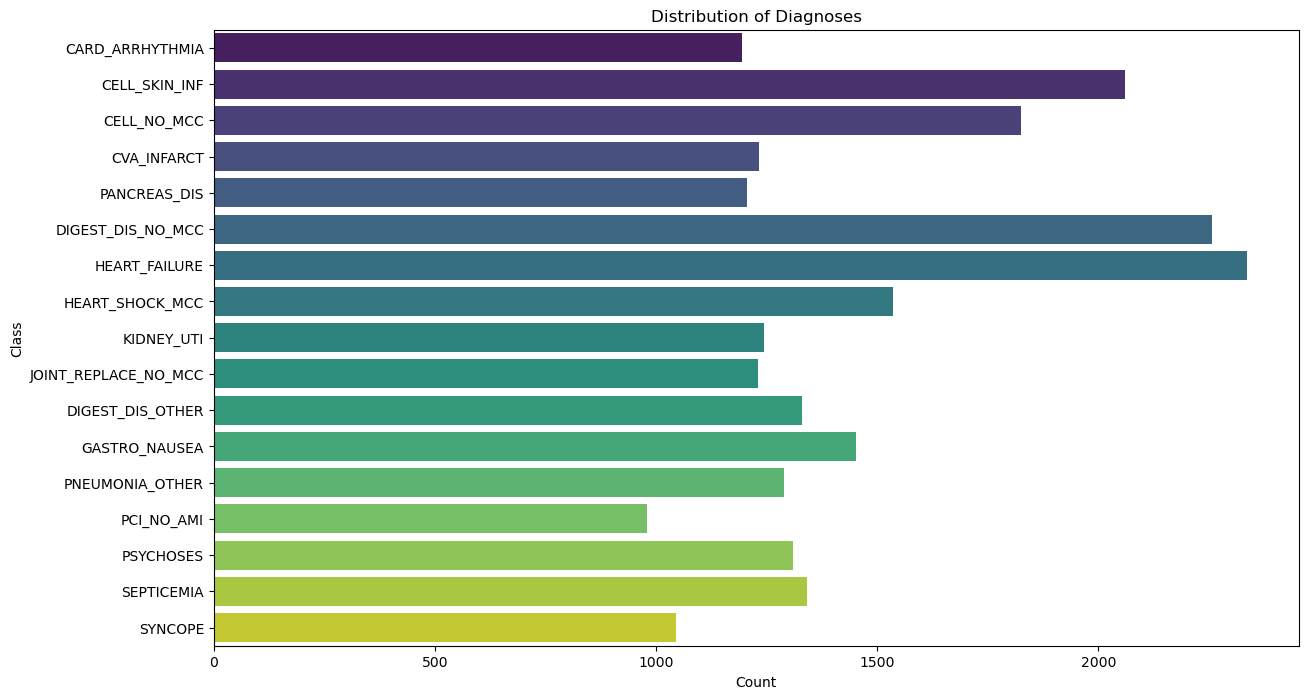

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of classes to show distribution for
# classes = [
#     'CARD_ARRHYTHMIA', 'CELL_SKIN_INF', 'CELL_NO_MCC', 'CESAREAN', 'CVA_INFARCT', 'PANCREAS_DIS',
#     'DIGEST_DIS_NO_MCC', 'HEART_FAILURE', 'HEART_SHOCK_MCC', 'KIDNEY_UTI',
#     'JOINT_REPLACE_NO_MCC', 'DIGEST_DIS_OTHER', 'GASTRO_NAUSEA', 'PNEUMONIA_OTHER',
#     'PCI_NO_AMI', 'PSYCHOSES', 'SEPTICEMIA', 'SYNCOPE', 'VAG_DELIVERY', 'VAG_DEL_NO_COMPL'
# ]

# List of columns to count diagnoses
classes = [
    'CARD_ARRHYTHMIA', 'CELL_SKIN_INF', 'CELL_NO_MCC', 
    'CVA_INFARCT', 'PANCREAS_DIS', 'DIGEST_DIS_NO_MCC', 
    'HEART_FAILURE', 'HEART_SHOCK_MCC', 'KIDNEY_UTI', 
    'JOINT_REPLACE_NO_MCC', 'DIGEST_DIS_OTHER', 'GASTRO_NAUSEA', 
    'PNEUMONIA_OTHER', 'PCI_NO_AMI', 'PSYCHOSES', 
    'SEPTICEMIA', 'SYNCOPE'
]

# Calculate the count of 1s for each binary column
class_counts = {col: adm_df[col].sum() for col in classes}

# Create a DataFrame from the class counts
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Plot the distribution of counts for each class
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Class', data=class_counts_df, palette='viridis')
plt.title('Distribution of Diagnoses')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()


In [18]:
adm_df.shape

(20237, 23)

In [19]:
drop_columns = ['VAG_DEL_NO_COMPL', 'VAG_DELIVERY', 'CESAREAN']

adm_df.drop(columns=drop_columns, inplace=True)
adm_df.shape


(20237, 20)

In [17]:
# List of columns to count diagnoses
diagnosis_columns = [
    'CARD_ARRHYTHMIA', 'CELL_SKIN_INF', 'CELL_NO_MCC', 
    'CVA_INFARCT', 'PANCREAS_DIS', 'DIGEST_DIS_NO_MCC', 
    'HEART_FAILURE', 'HEART_SHOCK_MCC', 'KIDNEY_UTI', 
    'JOINT_REPLACE_NO_MCC', 'DIGEST_DIS_OTHER', 'GASTRO_NAUSEA', 
    'PNEUMONIA_OTHER', 'PCI_NO_AMI', 'PSYCHOSES', 
    'SEPTICEMIA', 'SYNCOPE'
]

# Create a new column to count the number of diagnoses for each row
adm_df['diagnosis_count'] = adm_df[diagnosis_columns].sum(axis=1)

# Count the occurrences of rows with different numbers of diagnoses
diagnosis_distribution = adm_df['diagnosis_count'].value_counts().sort_index()

# Display the distribution
print(diagnosis_distribution)


diagnosis_count
0      335
1    14939
2     4963
Name: count, dtype: int64


In [27]:
adm_df = adm_df[adm_df['diagnosis_count'] > 0]
adm_df = adm_df[~adm_df['disch_journal_text'].isna()]
adm_df.shape

(19584, 21)

In [19]:
adm_df

,hadm_id,discharge_location,CARD_ARRHYTHMIA,CELL_SKIN_INF,CELL_NO_MCC,CVA_INFARCT,PANCREAS_DIS,DIGEST_DIS_NO_MCC,HEART_FAILURE,HEART_SHOCK_MCC,...,JOINT_REPLACE_NO_MCC,DIGEST_DIS_OTHER,GASTRO_NAUSEA,PNEUMONIA_OTHER,PCI_NO_AMI,PSYCHOSES,SEPTICEMIA,SYNCOPE,disch_journal_text,diagnosis_count
0,29659838,HOME HEALTH CARE,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,"Admission Type: EW EMER., Admission Location: ...",1
1,20897796,HOME HEALTH CARE,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,"Admission Type: OBSERVATION ADMIT, Admission L...",2
2,21975601,HOME,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,"Admission Type: EW EMER., Admission Location: ...",1
3,28994087,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"Admission Type: EW EMER., Admission Location: ...",1
4,26295318,SKILLED NURSING FACILITY,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,"Admission Type: URGENT, Admission Location: TR...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20232,25047276,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,"Admission Type: SURGICAL SAME DAY ADMISSION, A...",1
20233,20274882,HOME,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,"Admission Type: OBSERVATION ADMIT, Admission L...",1
20234,28129567,HOME,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,"Admission Type: URGENT, Admission Location: PH...",1
20235,27638769,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"Admission Type: EW EMER., Admission Location: ...",1


In [28]:
pprint(adm_df['disch_journal_text'].iloc[0])

('Admission Type: EW EMER., Admission Location: EMERGENCY ROOM, Insurance: '
 'Medicare, Language: ENGLISH, Marital Status: MARRIED, Race: BLACK/AFRICAN '
 'AMERICAN, Gender: F, Age: 73  \n'
 'Name:  ___          Unit No:   ___\n'
 ' \n'
 'Admission Date:  ___              Discharge Date:   ___\n'
 ' \n'
 'Date of Birth:  ___             Sex:   F\n'
 ' \n'
 'Service: MEDICINE\n'
 ' \n'
 'Allergies: \n'
 'No Known Allergies / Adverse Drug Reactions\n'
 ' \n'
 'Attending: ___.\n'
 ' \n'
 'Chief Complaint:\n'
 'dyspnea on exertion\n'
 ' \n'
 'Major Surgical or Invasive Procedure:\n'
 'None\n'
 '\n'
 ' \n'
 'History of Present Illness:\n'
 '___ with a history of of HTN, CAD s/p DES with ischemic MR and \n'
 'systolic dysfunction, ___ on torsemide, hx of DVT, who presents \n'
 'with 4 days of dyspnea on exertion, leg swelling, and 10 weight \n'
 'gain.\n'
 '\n'
 'Of note, patient was seen in the Heart Failure Clinic with Dr. \n'
 '___ on ___ where she noted that she has had \n'
 'persistent

In [29]:
adm_df['disch_journal_text'].isna().sum()

0

In [22]:
import re
import pandas as pd

# Load the merged dataframe (assume it's already merged and cleaned)
# merged_df = ...

# Define the sections to extract
sections_to_use = [
    'Admission Type', 'Chief Complaint', 'Major Surgical or Invasive Procedure', 'History of Present Illness',
    'Past Medical History', 'Social History', 'Physical Exam', 'Brief Hospital Course', 'Medications on Admission'
]
# Function to parse discharge notes into sections
def parse_discharge_notes(text):
    if not isinstance(text, str):
        return {section.strip(':'): "" for section in sections_to_use}
    
    sections = [
        'Admission Type:',
        'Chief Complaint:', 'Major Surgical or Invasive Procedure:', 'History of Present Illness:',
        'Past Medical History:', 'Social History:', 'Physical Exam:', 'Brief Hospital Course:',
        'Medications on Admission:', 'Discharge Medications:', 'Discharge Disposition:',
        'Discharge Diagnosis:', 'Discharge Condition:', 'Discharge Instructions:', 'Followup Instructions:'
    ]
    
    section_pattern = '|'.join([re.escape(section) for section in sections])
    split_text = re.split(f'({section_pattern})', text)

    # Initialize all sections with empty strings
    parsed_sections = {section.strip(':'): "" for section in sections}
    current_section = None

    for part in split_text:
        part = part.strip()
        if part in sections:
            current_section = part.strip(':')
        elif current_section:
            parsed_sections[current_section] += " " + part

    # Include the section headers in the text
    for key in parsed_sections:
        if parsed_sections[key]:
            parsed_sections[key] = f"{key}: {parsed_sections[key].strip()}"

    return parsed_sections

merged_df = adm_df
# Apply the function to the disc_text column
parsed_notes = merged_df['disch_journal_text'].apply(parse_discharge_notes)

# Convert parsed sections into separate columns
parsed_df = pd.DataFrame(parsed_notes.tolist())

# Reset index for both dataframes to ensure alignment
merged_df.reset_index(drop=True, inplace=True)
parsed_df.reset_index(drop=True, inplace=True)

# Merge with the original dataframe
result_df = pd.concat([merged_df, parsed_df], axis=1)

# Extract only the necessary sections and admission text for training
result_df['training_text'] = result_df.apply(
    lambda row: " ".join([row[section] if pd.notna(row[section]) else '' for section in sections_to_use]),
    axis=1
)


result_df


,hadm_id,discharge_location,CARD_ARRHYTHMIA,CELL_SKIN_INF,CELL_NO_MCC,CVA_INFARCT,PANCREAS_DIS,DIGEST_DIS_NO_MCC,HEART_FAILURE,HEART_SHOCK_MCC,...,Physical Exam,Brief Hospital Course,Medications on Admission,Discharge Medications,Discharge Disposition,Discharge Diagnosis,Discharge Condition,Discharge Instructions,Followup Instructions,training_text
0,29659838,HOME HEALTH CARE,0,0,0,0,0,0,1,0,...,Physical Exam: ADMISSION PHYSICAL EXAMINATION:...,Brief Hospital Course: ___ year-old female wit...,Medications on Admission: The Preadmission Med...,Discharge Medications: 1. HumuLIN 70/30 (insul...,Discharge Disposition: Home With Service\n \nF...,Discharge Diagnosis: Primary Diagnoses:\nAcute...,Discharge Condition: Mental Status: Clear and ...,"Discharge Instructions: Mrs. ___, \n\n___ were...",Followup Instructions: ___,"Admission Type: EW EMER., Admission Location: ..."
1,20897796,HOME HEALTH CARE,0,0,0,0,0,0,1,1,...,Physical Exam: ==============================\...,,Medications on Admission: The Preadmission Med...,Discharge Medications: 1. Acetaminophen 325-6...,Discharge Disposition: Home With Service\n \nF...,Discharge Diagnosis: PRIMARY DIAGNOSIS\n- Acut...,Discharge Condition: Mental Status: Clear and ...,"Discharge Instructions: Dear ___,\n\nYou were ...",Followup Instructions: ___,"Admission Type: OBSERVATION ADMIT, Admission L..."
2,21975601,HOME,0,0,0,0,0,0,0,0,...,Physical Exam: Admission physical exam:\nVS: 9...,Brief Hospital Course: # Unstable angina: Desc...,Medications on Admission: - Clopidogrel 75 mg ...,Discharge Medications: 1. clopidogrel 75 mg Ta...,Discharge Disposition: Home,Discharge Diagnosis: Primary diagnosis:\nAtypi...,Discharge Condition: Mental Status: Clear and ...,Discharge Instructions: It was a pleasure taki...,Followup Instructions: ___,"Admission Type: EW EMER., Admission Location: ..."
3,28994087,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,Physical Exam: On Admission:\nVitals: T: 96.9 ...,Brief Hospital Course: ___ female with NSCLC s...,Medications on Admission: amlodipine 5 mg Tabl...,Discharge Medications: 1. oxygen\n___ continuo...,Discharge Disposition: Home With Service\n \nF...,Discharge Diagnosis: # post-obstructive pneumo...,Discharge Condition: Mental Status: Clear and ...,Discharge Instructions: You were admitted with...,Followup Instructions: ___,"Admission Type: EW EMER., Admission Location: ..."
4,26295318,SKILLED NURSING FACILITY,0,0,0,0,0,0,1,1,...,,Brief Hospital Course: TRANSITIONAL ISSUES:\n=...,,Discharge Medications: 1. Rosuvastatin Calciu...,Discharge Disposition: Extended Care\n \nFacil...,Discharge Diagnosis: Primary diagnosis:\n=====...,Discharge Condition: Mental Status: Clear and ...,"Discharge Instructions: Dear Mr. ___,\n\nIt wa...",Followup Instructions: ___,"Admission Type: URGENT, Admission Location: TR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20232,25047276,HOME HEALTH CARE,0,0,0,0,0,0,0,0,...,Physical Exam: Well appearing in no acute dist...,Brief Hospital Course: The patient was admitte...,Medications on Admission: The Preadmission Med...,Discharge Medications: 1. fluticasone 50 mcg/a...,Discharge Disposition: Home With Service\n \nF...,"Discharge Diagnosis: Osteoarthritis, Left Knee",Discharge Condition: Mental Status: Clear and ...,Discharge Instructions: 1. Please return to th...,Followup Instructions: ___,"Admission Type: SURGICAL SAME DAY ADMISSION, A..."
20233,20274882,HOME,0,0,0,0,0,0,0,0,...,Physical Exam: ADMISSION PHYSICAL EXAM\nVitals...,,Medications on Admission: The Preadmission Med...,Discharge Medications: 1. Amlodipine 5 mg PO D...,Discharge Disposition: Home,Discharge Diagnosis: PRIMARY DIAGNOSIS\n======...,Discharge Condition: Mental Status: Clear and ...,"Discharge Instructions: Dear ___,\n\n___ were ...",Followup Instructions: ___,"Admission Type: OBSERVATION ADMIT, Admission L..."
20234,28129567,HOME,0,0,0,0,0,0,0,0,...,Physical Exam: Admission PE: \n\nVS: Wt=47.9 T...,Brief Hospital Course: Po

In [23]:
pprint(result_df['training_text'].iloc[0])

('Admission Type: EW EMER., Admission Location: EMERGENCY ROOM, Insurance: '
 'Medicare, Language: ENGLISH, Marital Status: MARRIED, Race: BLACK/AFRICAN '
 'AMERICAN, Gender: F, Age: 73  \n'
 'Name:  ___          Unit No:   ___\n'
 ' \n'
 'Admission Date:  ___              Discharge Date:   ___\n'
 ' \n'
 'Date of Birth:  ___             Sex:   F\n'
 ' \n'
 'Service: MEDICINE\n'
 ' \n'
 'Allergies: \n'
 'No Known Allergies / Adverse Drug Reactions\n'
 ' \n'
 'Attending: ___. Chief Complaint: dyspnea on exertion Major Surgical or '
 'Invasive Procedure: None History of Present Illness: ___ with a history of '
 'of HTN, CAD s/p DES with ischemic MR and \n'
 'systolic dysfunction, ___ on torsemide, hx of DVT, who presents \n'
 'with 4 days of dyspnea on exertion, leg swelling, and 10 weight \n'
 'gain.\n'
 '\n'
 'Of note, patient was seen in the Heart Failure Clinic with Dr. \n'
 '___ on ___ where she noted that she has had \n'
 'persistent dyspnea on exertion and PND after a lengthy prio

In [41]:
result_df.to_csv('data/training_text2_df.csv', index=False)

In [35]:
result_df.iloc[0]

hadm_id                                                                          29659838
discharge_location                                                       HOME HEALTH CARE
CARD_ARRHYTHMIA                                                                         0
CELL_SKIN_INF                                                                           0
CELL_NO_MCC                                                                             0
CVA_INFARCT                                                                             0
PANCREAS_DIS                                                                            0
DIGEST_DIS_NO_MCC                                                                       0
HEART_FAILURE                                                                           1
HEART_SHOCK_MCC                                                                         0
KIDNEY_UTI                                                                              0
JOINT_REPL

In [37]:
pprint(result_df['training_text'].iloc[1])

('Admission Type: OBSERVATION ADMIT, Admission Location: WALK-IN/SELF '
 'REFERRAL, Insurance: Other, Language: ENGLISH, Marital Status: MARRIED, '
 'Race: BLACK/AFRICAN AMERICAN, Gender: F, Age: 73  \n'
 'Name:  ___          Unit No:   ___\n'
 ' \n'
 'Admission Date:  ___              Discharge Date:   ___\n'
 ' \n'
 'Date of Birth:  ___             Sex:   F\n'
 ' \n'
 'Service: MEDICINE\n'
 ' \n'
 'Allergies: \n'
 'No Known Allergies / Adverse Drug Reactions\n'
 ' \n'
 'Attending: ___. Chief Complaint: shortness of breath Major Surgical or '
 'Invasive Procedure: None History of Present Illness: Patient is a ___ with '
 'history of coronary artery disease c/b\n'
 'ischemic MR ___ DES to LCX ___, TTE ___ with mild regional LV\n'
 'systolic dysfunction), heart failure with preserved ejection\n'
 'fraction (LVEF 50% ___, peripheral vascular disease, chronic\n'
 'kidney disease (stage IV), prior unprovoked DVT c/b severe UGIB\n'
 'while on AC, HTN, dyslipidemia, and T2DM who presents wit

In [24]:
pprint(result_df['training_text'].iloc[4])

('Admission Type: URGENT, Admission Location: TRANSFER FROM HOSPITAL, '
 'Insurance: Medicare, Language: ENGLISH, Marital Status: WIDOWED, Race: '
 'WHITE, Gender: M, Age: 86  \n'
 'Name:  ___              Unit No:   ___\n'
 ' \n'
 'Admission Date:  ___              Discharge Date:   ___\n'
 ' \n'
 'Date of Birth:  ___             Sex:   M\n'
 ' \n'
 'Service: MEDICINE\n'
 ' \n'
 'Allergies: \n'
 'Corgard / ___\n'
 ' \n'
 'Attending: ___.  Major Surgical or Invasive Procedure: None\n'
 '\n'
 'attach\n'
 ' \n'
 'Pertinent Results:\n'
 'ADMISSION LABS:\n'
 '===============\n'
 '___ 12:48AM BLOOD WBC-10.3* RBC-3.71* Hgb-10.6* Hct-36.6* \n'
 'MCV-99* MCH-28.6 MCHC-29.0* RDW-18.6* RDWSD-55.8* Plt ___\n'
 '___ 12:48AM BLOOD ___ PTT-82.4* ___\n'
 '___ 12:48AM BLOOD Glucose-128* UreaN-47* Creat-2.2* Na-144 \n'
 'K-3.8 Cl-105 HCO3-22 AnGap-17\n'
 '___ 12:48AM BLOOD ALT-75* AST-55* AlkPhos-150* TotBili-1.1\n'
 '___ 12:48AM BLOOD ___\n'
 '___ 12:48AM BLOOD Calcium-9.2 Phos-4.0 Mg-2.3\n'
 '___ 01: